# Simple network creation

This example creates a striatal network of 100 dSPN and 100 iSPN neurons. You can also do this using the command line interface, see "snudda -h".

This notebook is started in the ```Snudda/snudda/examples/notebooks``` directory, as all paths are given relative to there.

First we create a ```network-config.json``` file in ```networks/simple_example``` which is a subdirectory to the ```notebooks``` directory. The 200 neurons are placed inside a cube, with cell density 80500 neurons/mm3. The neuron morphologies and parameters are taken from the ```Snudda/snudda/data/neurons/dspn``` and ```ispn``` folders.

Here we have set the ```random_seed``` to ```12345```.

In [1]:
import os
from snudda import SnuddaInit

network_path = os.path.join("networks","simple_example")
cnc = SnuddaInit(network_path=network_path, random_seed=12345)
cnc.define_striatum(num_dSPN=100, num_iSPN=100, num_FS=0, num_LTS=0, num_ChIN=0,
                    volume_type="cube", neurons_dir="$DATA/neurons")
cnc.write_json()

Using cube for striatum
Adding neurons: dSPN from dir $DATA/neurons/striatum/dspn
Adding neurons: iSPN from dir $DATA/neurons/striatum/ispn
Writing networks/simple_example/network-config.json


This reads in the network-config.json file and places the dSPN and iSPN neurons within the cube volume, then writes the positions to the network-neuron-positions.hdf5 file.

In [2]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.parse_config()
sp.write_data()

In [3]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path)
sd.detect()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 21/64 (200 neurons)
Processing hyper voxel : 20/64 (177 neurons)
Processing hyper voxel : 17/64 (171 neurons)
Processing hyper voxel : 5/64 (163 neurons)
Processing hyper voxel : 37/64 (140 neurons)
Processing hyper voxel : 22/64 (136 neurons)
Processing hyper voxel : 25/64 (124 neurons)
Processing hyper voxel : 4/64 (84 neurons)
Processing hyper voxel : 16/64 (83 neurons)
Processing hyper voxel : 1/64 (69 neurons)
Processing hyper voxel : 33/64 (64 neurons)
Processing hyper voxel : 36/64 (51 neurons)
Processing hyper voxel : 24/64 (48 neurons)
Processing hyper voxel : 6/64 (46 neurons)
Processing hyper voxel : 18/64 (43 neurons)
Processing hyper voxel : 9/64 (41 neurons)
Processing hyper voxel : 38/64 (39 neurons)
Processing hyper voxel : 26/64 (31 neurons)
Processing hyper voxel : 0/64 (25 neurons)
Processing hyper voxel : 41/64 (25 neurons)
Processing hyper voxel : 32/64 (15 neurons)
Processing hyper 

Prune the synapses in the network based on the connection information in the ```network-config.json``` file.

In [4]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

Read 424229 out of total 424229 synapses


Use matplotlib to plot the network. Note that this can be quite slow for larger networks.

Loading 200 neurons with 23159 synapses and 0 gap junctions


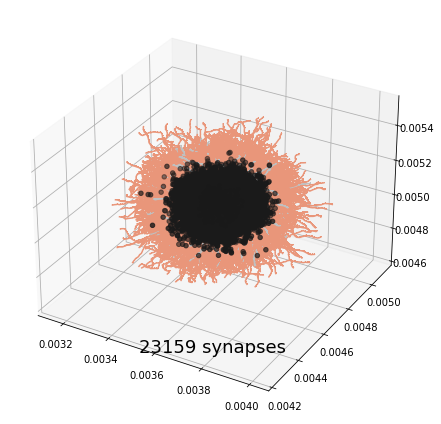

In [5]:
from snudda.plotting import PlotNetwork
pn = PlotNetwork(network_path)
pn.plot()
pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)